In [45]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random

In [46]:
DIRECTORY = r'../input/train-set/train'
VAL_DIRECTORY = r'../input/val-set'
   
CATEGORIES = ['all', 'hem']        

In [47]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

In [48]:
data = []
i = 0
#plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    #path = DIRECTORY
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        #print(type(arr))
        crop_arr = crop_center(arr, (210,210))
        #if 1 <= i+1 <= 140:                      # total 140 image
        #    ax = plt.subplot(13, 11, i+1)
        #plt.imshow(crop_arr)
        i += 1
        data.append([crop_arr, label])

In [49]:
random.shuffle(data)

x_train = []
y_train = []

for features, label in data:
    x_train.append(features)
    y_train.append(label)

    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [50]:
val_data = []
i = 0
#plt.figure(figsize=(15, 15))
for category in CATEGORIES:
    path = os.path.join(VAL_DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path)
        crop_arr = crop_center(arr, (210,210))
        #if 1 <= i+1 <= 70:                     # total image 70
        #    ax = plt.subplot(10, 7, i+1)
        #plt.imshow(crop_arr)
        i += 1
        val_data.append([crop_arr, label])

In [51]:
random.shuffle(val_data)

x_val = []
y_val = []

for features, label in val_data:
    x_val.append(features)
    y_val.append(label)

    
x_val = np.array(x_val)
y_val = np.array(y_val)

In [52]:
'''
print(type(x_train))
print(x_train.dtype)
x_train = x_train.astype('float32')/255.0
x_val   = x_val.astype('float32')/255.0
print(type(x_train))
print(x_train.dtype)
print(type(x_val))
print(x_val.dtype)
'''#'''

"\nprint(type(x_train))\nprint(x_train.dtype)\nx_train = x_train.astype('float32')/255.0\nx_val   = x_val.astype('float32')/255.0\nprint(type(x_train))\nprint(x_train.dtype)\nprint(type(x_val))\nprint(x_val.dtype)\n"

In [53]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import keras
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
from keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau












def build_vgg16_unet(input_shape):

    """ Input """
    inputs = Input(input_shape)
    s = Lambda(lambda x: x/255) (inputs)

    """ Pre-trained VGG16 Model """
    vgg16 = VGG16(include_top=True, weights=None, input_tensor=s, input_shape=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid")
    
    return vgg16

     

if __name__ == "__main__":
    input_shape = (210, 210, 3)
    model = build_vgg16_unet(input_shape)
    model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 210, 210, 3)]     0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 210, 210, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 210, 210, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 210, 210, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 105, 105, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 105, 105, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 105, 105, 128)     147584

In [54]:
'''

#inputs = Input((210, 210, 3))

#s = Lambda(lambda x: x/255) (inputs)

model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(210,210,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
'''#'''

'\n\n#inputs = Input((210, 210, 3))\n\n#s = Lambda(lambda x: x/255) (inputs)\n\nmodel = tf.keras.applications.VGG16(\n    include_top=True,\n    weights=None,\n    input_tensor=None,\n    input_shape=(210,210,3),\n    pooling=None,\n    classes=1,\n    classifier_activation="sigmoid",\n)\n'

In [55]:
#model.summary()

In [56]:
from keras.optimizers import Adam, RMSprop
#adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
sgd_opt = SGD(lr=1e-06, momentum=0.0, decay=0.0, nesterov=False)
#rmsp_opt = RMSprop(lr=1e-4, decay=0.9)
# eve_opt = Eve(lr=1e-4, decay=1E-4, beta_1=0.9, beta_2=0.999, beta_3=0.999, small_k=0.1, big_K=10, epsilon=1e-08)

model.compile(optimizer= sgd_opt,
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [57]:
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint('baseline_vgg.h5', monitor='val_accuracy', save_best_only=True, mode='max'),
    keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, verbose=1, patience=5, mode='max')]


In [58]:
import math
BATCH_SIZE=128

TRAINING_SIZE = x_train.shape[0]

VALIDATION_SIZE = x_val.shape[0]

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / BATCH_SIZE))
train_steps_per_epoch = compute_steps_per_epoch(TRAINING_SIZE)
val_steps = compute_steps_per_epoch(VALIDATION_SIZE)
print(train_steps_per_epoch, val_steps)

84 15


In [59]:
history = model.fit(x_train, y_train, validation_data = (x_val,y_val), verbose = 1, batch_size=BATCH_SIZE, steps_per_epoch = train_steps_per_epoch, validation_steps = val_steps, epochs = 50, shuffle = True, callbacks = callbacks)

Epoch 1/50
84/84 [==============================] - 35s 304ms/step - loss: 0.6931 - accuracy: 0.5585 - val_loss: 0.6931 - val_accuracy: 0.6042
Epoch 2/50
84/84 [==============================] - 7s 80ms/step - loss: 0.6931 - accuracy: 0.6452 - val_loss: 0.6931 - val_accuracy: 0.6272
Epoch 3/50
84/84 [==============================] - 7s 80ms/step - loss: 0.6931 - accuracy: 0.6748 - val_loss: 0.6931 - val_accuracy: 0.6470
Epoch 4/50
84/84 [==============================] - 7s 79ms/step - loss: 0.6931 - accuracy: 0.6834 - val_loss: 0.6931 - val_accuracy: 0.6502
Epoch 5/50
84/84 [==============================] - 7s 79ms/step - loss: 0.6931 - accuracy: 0.6799 - val_loss: 0.6931 - val_accuracy: 0.6518
Epoch 6/50
84/84 [==============================] - 7s 79ms/step - loss: 0.6931 - accuracy: 0.6881 - val_loss: 0.6931 - val_accuracy: 0.6529
Epoch 7/50
84/84 [==============================] - 7s 79ms/step - loss: 0.6931 - accuracy: 0.6906 - val_loss: 0.6931 - val_accuracy: 0.6529
Epoch 8/50


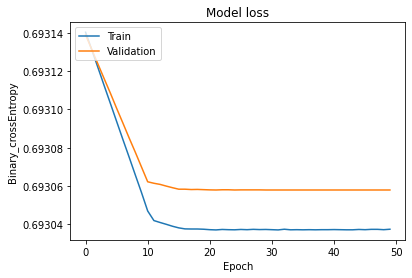

In [60]:
#'''                                                                                                                                                      
plt.plot(history.history['loss'])                                                                                                                                        
plt.plot(history.history['val_loss'])                                                                                                                                                                                                                                                     
plt.title('Model loss')                                                                                   
plt.ylabel('Binary_crossEntropy')                                                                                                                 
plt.xlabel('Epoch')                                                                      
plt.legend(['Train', 'Validation'], loc='upper left')          
plt.show()                                                                    
#'''                                                      

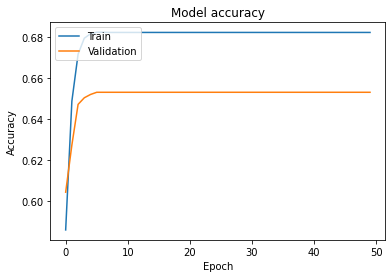

In [61]:
#'''                     
plt.plot(history.history['accuracy'])                                            
plt.plot(history.history['val_accuracy'])         
plt.title('Model accuracy')                           
plt.ylabel('Accuracy')                         
plt.xlabel('Epoch')                      
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#'''

In [62]:
#'''
print('Lowest training loss: ', min(history.history['loss']))
print('Lowest validation loss: ', min(history.history['val_loss']))        
print('Highest training accuracy: ', max(history.history['accuracy']))
print('Highest validation accuracy: ', max(history.history['val_accuracy']))
#'''  

Lowest training loss:  0.6930370330810547
Lowest validation loss:  0.6930578947067261
Highest training accuracy:  0.6822061538696289
Highest validation accuracy:  0.6529191136360168


In [63]:
from IPython.display import FileLink
FileLink('./baseline_vgg.h5')    

/kaggle/working/baseline_vgg.h5